In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_clusters(x, k = 2, visualize = False):
    '''
    x input is numpay 2-D array with each sample is a row 
    k input is number of means or clusters
    '''
    
    if type(k) != int:
        raise Exception("Clusters should be atleast 2 !!\nbut given k is less than 2.")
    elif k < 2:
         raise Exception("Clusters should be atleast 2 !!\nbut given k is less than 2.")
    
    
    m = len(x)
    threshold = 1 #just a thershold initialization for stopping by distortion step
    𝜇_array = x[np.random.choice(m, k,replace=True), :]
    
    distances = []
    clusters = []
    converge_list = []
        
    while (threshold > 1e-20):
        dist = 0
        
        for i in range(k):
            if i == 0:
                distances = np.linalg.norm(x - 𝜇_array[i], axis = 1)                    
                continue
            distances = np.vstack((distances,np.linalg.norm(x - 𝜇_array[i], axis = 1)))

        clusters = np.argmin(distances.T, axis = 1)
        
        if visualize :
            plt.scatter(x[:,0],x[:,1], c = clusters)
            plt.scatter(𝜇_array[:,0],𝜇_array[:,1], s = 450, c= 'r', marker = 'x')
            plt.show()

            
#         if np.count_nonzero(np.unique(clusters_list)) != k-1 :
#             threshold = -1 
        if np.sum(np.isnan(𝜇_array)) > 0 :
                threshold = 0
            
        for i in range(k):
            dist += np.square(np.linalg.norm(x[clusters == i] - 𝜇_array[i]))
            
            𝜇_array[i] =x[clusters == i].mean(axis = 0)
                
        converge_list.append(dist/m)

            
        if len(converge_list) <= 1:
            threshold = dist
        else:

            threshold = converge_list[-2] - converge_list[-1] 

    return 𝜇_array, threshold  ,dist ,converge_list, clusters

In [3]:
iris = datasets.load_iris().data
𝜇_array, threshold  ,dist ,converge_list, clusters = make_clusters(iris[:,:2], k = 3)
print(dist,converge_list)

37.08627024722932 [0.5729333333333335, 0.3123166026606201, 0.253245372518651, 0.24958238453576115, 0.24858680791761154, 0.2482177244255327, 0.2476451447727542, 0.24733430549503752, 0.24724180164819548, 0.24724180164819548]


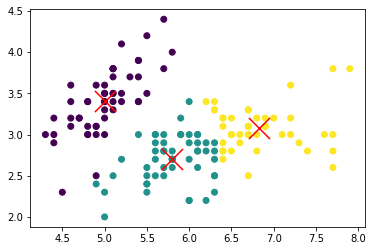

In [4]:
plt.scatter(iris[:,0],iris[:,1], c = clusters)
plt.scatter(𝜇_array[:,0],𝜇_array[:,1], s = 450, c= 'r', marker = 'x')
plt.show()

In [5]:
def KMeans(x, k = 2):
    iterations = 100
    min_dist = np.inf
    index = -1
    
    centroides = []
    converge_list = []
    clusters_list = []
    
    for i in range(iterations):
        𝜇_array, threshold  ,dist ,converges, clusters = make_clusters(x, k = k)
        
#         print(i)
        
        if dist < min_dist:
#             print('x')
            min_dist = dist
            centroides = 𝜇_array
            converge_list = converges
            clusters_list = clusters
            index = i
            
        
    return (centroides, min_dist, converge_list, clusters_list,index)

In [6]:
centroides, min_dist, converge_list, clusters_list,index = KMeans(iris[:,:2], k = 7)
# print(index)

C:\Users\Omar\AppData\Local\Temp\ipykernel_20012\1311041092.py:46: RuntimeWarning: Mean of empty slice.
  𝜇_array[i] =x[clusters == i].mean(axis = 0)
c:\users\omar\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


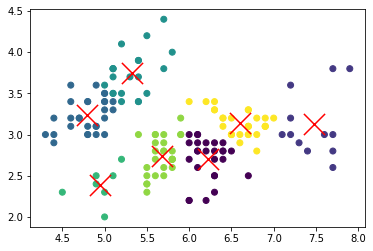

In [7]:
plt.scatter(iris[:,0],iris[:,1], c = clusters_list)
plt.scatter(centroides[:,0],centroides[:,1], s = 450, c= 'r', marker = 'x')
plt.show()

In [8]:
def elbow(x,k=10, visualize = False):
    dist_list = []
#     kmin = np.inf
    for i in range(2,k+1):
        centroides, min_dist, converge_list, clusters_list,index = KMeans(x, k = i)
        dist_list.append(min_dist)
#         print(dist_list)
        
        if visualize :
            plt.scatter(iris[:,0],iris[:,1], c = clusters_list)
            plt.scatter(centroides[:,0],centroides[:,1], s = 450, c= 'r', marker = 'x')
            plt.show()
        
        
    return dist_list


        

In [13]:
dist_list = elbow(iris[:,:2], k = 22)

C:\Users\Omar\AppData\Local\Temp\ipykernel_20012\1311041092.py:46: RuntimeWarning: Mean of empty slice.
  𝜇_array[i] =x[clusters == i].mean(axis = 0)


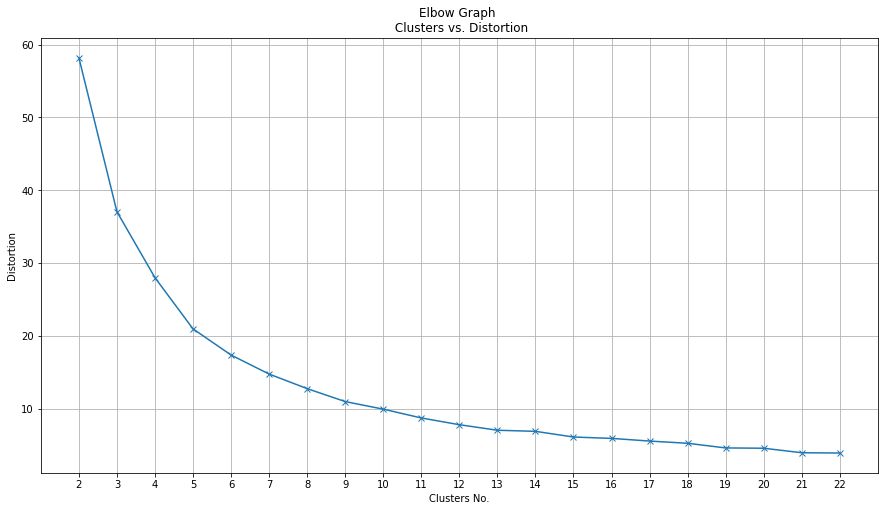

In [28]:
plt.figure(figsize=(15,8))

plt.plot(range(2, 2+len(dist_list)),dist_list,marker = 'x',)
plt.grid()
plt.xlabel('Clusters No.')
plt.ylabel('Distortion')
plt.title('Elbow Graph \n Clusters vs. Distortion')
plt.xticks(range(2, 2+len(dist_list)))

plt.show()